<a href="https://colab.research.google.com/github/nobobobo/ml-handson/blob/master/digits_recognition_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognize handwritten digits with scikit-learn

## Feature Engineering

### Import dataset

In [0]:
from sklearn import datasets
digits = datasets.load_digits()

### Display data

In [2]:
# print raw data with its dimension and shape
print(digits.data)
print('Dim: ', digits.data.ndim)
print('Shape: ', digits.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Dim:  2
Shape:  (1797, 64)


In [3]:
# print target
print(digits.target)

[0 1 2 ... 8 9 8]


In [4]:
# print raw data at index of 5
print(digits.data[5])

[ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]


# Visualize data

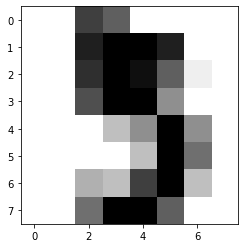

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

plt.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

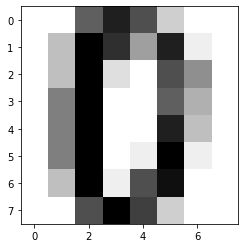

In [7]:
plt.imshow(digits.images[30], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

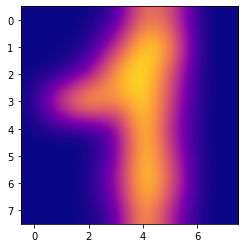

In [9]:
plt.imshow(digits.images[47], cmap='plasma', interpolation='bicubic')
plt.show()